# Comprehensive EDA Analysis of Housing Dataset

This notebook performs a detailed exploratory data analysis using all available methods from the ExploratoryAnalysis class. We will analyze:
1. Basic data summary and statistics
2. Univariate analysis with and without plots
3. Bivariate analysis with and without plots
4. Statistical tests and distribution comparisons
5. Correlation analysis
6. Advanced visualizations

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from eda import ExploratoryAnalysis

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Load the housing dataset
df = pd.read_csv('housing.csv')

# Initialize the EDA class
eda = ExploratoryAnalysis(df)

## 1. Basic Data Summary

Let's start with a basic overview of our dataset using the `basic_summary()` method.

In [66]:
# Get basic summary of the data
eda.basic_summary()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

Numerical Features Summary:
         MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
count 20640.000 20640.000 20640.000  20640.000   20640.000 20640.000   
mean      3.871    28.639     5.429      1.097    1425.477     3.071   
std       1.900    12.586     2.474      0.474    1132.462    10.386   
min       0.500     1.000     0.846      0.333       3.000     0

## 2. Univariate Analysis

We'll perform univariate analysis on all columns using both statistical methods and visualizations.

In [67]:
# Perform univariate analysis for each column
univariate_results = {}

for column in df.columns:
    # Statistical analysis
    stats = eda.univariate_analysis(column)
    univariate_results[column] = stats

# Convert results to DataFrame for easy viewing
univariate_df = pd.DataFrame.from_dict(univariate_results, orient='index')

# Format the DataFrame for better display
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print("=== Univariate Analysis Results ===\n")
display(univariate_df.style.highlight_max(color='lightgreen').highlight_min(color='lightcoral'))

=== Univariate Analysis Results ===



,count,mean,median,mode,min,max,std,variance,skewness,kurtosis,q1,q3,iqr,missing_values
MedInc,20640,3.870671,3.534800,3.125000,0.499900,15.000100,1.899822,3.609323,1.646657,4.952524,2.563400,4.743250,2.179850,0
HouseAge,20640,28.639486,29.000000,52.000000,1.000000,52.000000,12.585558,158.396260,0.060331,-0.800629,18.000000,37.000000,19.000000,0
AveRooms,20640,5.429000,5.229129,5.000000,0.846154,141.909091,2.474173,6.121533,20.697869,879.353264,4.440716,6.052381,1.611665,0
AveBedrms,20640,1.096675,1.048780,1.000000,0.333333,34.066667,0.473911,0.224592,31.316956,1636.711972,1.006079,1.099526,0.093447,0
Population,20640,1425.476744,1166.000000,891.000000,3.000000,35682.000000,1132.462122,1282470.457233,4.935858,73.553116,787.000000,1725.000000,938.000000,0
AveOccup,20640,3.070655,2.818116,3.000000,0.692308,1243.333333,10.386050,107.870026,97.639561,10651.010636,2.429741,3.282261,0.852520,0
Latitude,20640,35.631861,34.260000,34.060000,32.540000,41.950000,2.135952,4.562293,0.465953,-1.117760,33.930000,37.710000,3.780000,0
Longitude,20640,-119.569704,-118.490000,-118.310000,-124.350000,-114.310000,2.003532,4.014139,-0.297801,-1.330152,-121.800000,-118.010000,3.790000,0
target,20640,2.068558,1.797000,5.000010,0.149990,5.000010,1.153956,1.331615,0.977763,0.327870,1.196000,2.647250,1.451250,0


In [68]:
# Format categorical variables summary
categorical_summary = {col: univariate_results[col].get('value_counts', {}) 
                     for col in df.columns if isinstance(univariate_results[col].get('value_counts'), dict)}

if categorical_summary:
    cat_df = pd.DataFrame(categorical_summary)
    print("=== Categorical Variables Summary ===\n")
    display(cat_df.fillna('-').style.background_gradient(cmap='YlOrRd'))

## 3. Bivariate Analysis

Now let's analyze relationships between pairs of variables.

In [69]:
# Perform bivariate analysis for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
bivariate_results = []

for i in range(len(numeric_cols)):
    for j in range(i + 1, len(numeric_cols)):
        x_col, y_col = numeric_cols[i], numeric_cols[j]
        
        # Statistical analysis
        stats = eda.bivariate_analysis(x_col, y_col)
        stats['x_variable'] = x_col
        stats['y_variable'] = y_col
        bivariate_results.append(stats)

# Convert results to DataFrame and format for display
bivariate_df = pd.DataFrame(bivariate_results)
bivariate_df = bivariate_df.round(4)

# Reorder columns for better presentation
display_cols = ['x_variable', 'y_variable', 'pearson_correlation', 'pearson_p_value', 
               'spearman_correlation', 'spearman_p_value']
other_cols = [col for col in bivariate_df.columns if col not in display_cols]
bivariate_df = bivariate_df[display_cols + other_cols]

print("=== Bivariate Analysis Results ===\n")
display(bivariate_df.style
       .background_gradient(subset=['pearson_correlation', 'spearman_correlation'], cmap='RdYlBu')
       .highlight_between(subset=['pearson_p_value', 'spearman_p_value'], 
                        left=0, right=0.05, color='lightgreen')
       .format({'pearson_correlation': '{:.4f}', 'spearman_correlation': '{:.4f}',
               'pearson_p_value': '{:.4f}', 'spearman_p_value': '{:.4f}'}))

=== Bivariate Analysis Results ===



AttributeError: 'ColormapRegistry' object has no attribute 'get_cmap'

## 4. Statistical Tests and Distribution Comparisons

Let's perform statistical tests between different groups in our data.

In [60]:
# Perform distribution comparisons and statistical tests
distribution_results = []

for col in numeric_cols:
    # Split data into two groups based on median
    median = df[col].median()
    group1 = df[df[col] <= median][col]
    group2 = df[df[col] > median][col]
    
    # Statistical tests
    stat_tests = eda.statistical_tests(group1.values, group2.values)
    stat_tests['feature'] = col
    stat_tests['median_split_value'] = median
    stat_tests['group1_size'] = len(group1)
    stat_tests['group2_size'] = len(group2)
    
    distribution_results.append(stat_tests)

# Convert to DataFrame and format for display
dist_df = pd.DataFrame(distribution_results)

# Reorder columns
display_cols = ['feature', 'median_split_value', 'group1_size', 'group2_size',
               't_statistic', 't_p_value', 'mannwhitney_statistic', 'mannwhitney_p_value',
               'ks_statistic', 'ks_p_value', 'wilcoxon_statistic', 'wilcoxon_p_value']
dist_df = dist_df[display_cols]

print("=== Distribution Comparison Results ===\n")
display(dist_df.style
       .background_gradient(subset=['t_statistic', 'mannwhitney_statistic', 'ks_statistic'], cmap='YlOrRd')
       .highlight_between(subset=['t_p_value', 'mannwhitney_p_value', 'ks_p_value', 'wilcoxon_p_value'],
                        left=0, right=0.05, color='lightgreen')
       .format({col: '{:.4f}' for col in dist_df.columns if 'statistic' in col or 'p_value' in col}))

=== Distribution Comparison Results ===



AttributeError: 'ColormapRegistry' object has no attribute 'get_cmap'

## 5. Correlation Analysis

Let's analyze correlations between variables using different methods.


=== Pearson Correlation Matrix ===



AttributeError: 'ColormapRegistry' object has no attribute 'get_cmap'

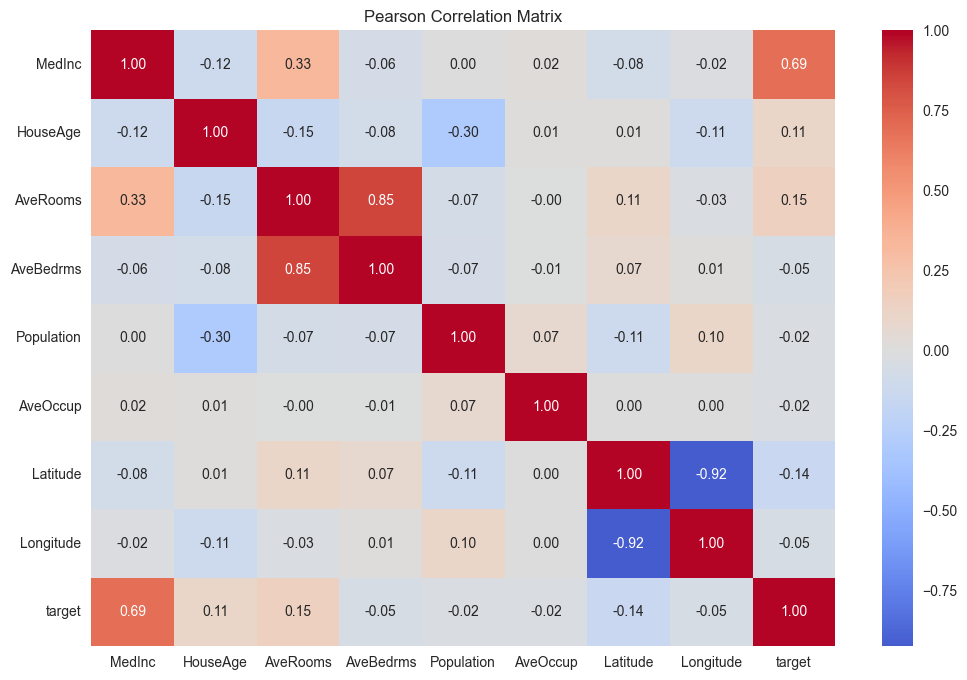


=== Spearman Correlation Matrix ===



AttributeError: 'ColormapRegistry' object has no attribute 'get_cmap'

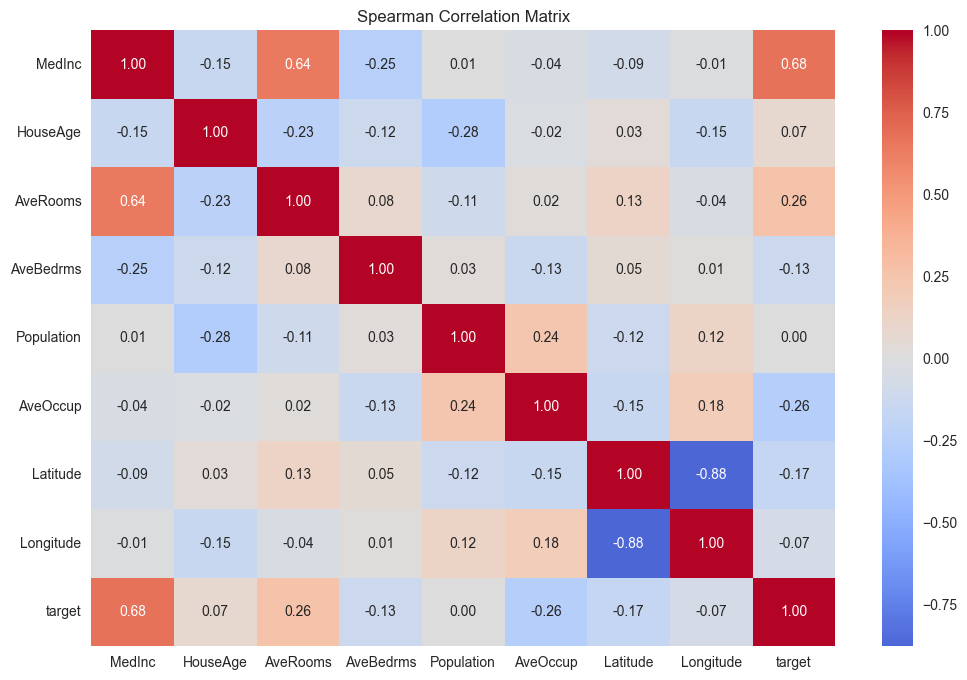

In [61]:
# Calculate and display correlation matrices with formatting
correlation_results = {}

for method in ['pearson', 'spearman']:
    corr_matrix = eda.correlation_matrix(method=method)
    correlation_results[method] = corr_matrix
    
    print(f"\n=== {method.capitalize()} Correlation Matrix ===\n")
    display(pd.DataFrame(corr_matrix)
           .style.background_gradient(cmap='RdYlBu', vmin=-1, vmax=1)
           .format('{:.4f}')
           .set_caption(f'{method.capitalize()} Correlation Matrix'))
    
    # Plot correlation heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
    plt.title(f'{method.capitalize()} Correlation Matrix')
    plt.show()

## 6. Data Type-Specific Analysis

Finally, let's get detailed descriptions based on data types.

In [62]:
# Get and display detailed descriptions by data type with formatting
type_descriptions = eda.describe_data()

for data_type, description in type_descriptions.items():
    print(f"\n=== {data_type.capitalize()} Features Description ===\n")
    if isinstance(description, pd.DataFrame):
        display(description.style
               .background_gradient(cmap='YlOrRd', subset=['std', 'mean'])
               .highlight_max(color='lightgreen')
               .highlight_min(color='lightcoral')
               .format(precision=3)
               .set_caption(f'{data_type.capitalize()} Features Statistics'))
    else:
        display(description)


=== Numeric Features Description ===



KeyError: "None of [Index(['std', 'mean'], dtype='object')] are in the [columns]"

## 7. Percentile Distribution Analysis

Let's analyze the data distribution using percentiles.

In [63]:
# Calculate percentiles for numeric columns
percentiles = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
percentile_results = {}

for col in numeric_cols:
    print(f"\n=== Percentile Distribution for {col} ===\n")
    # Calculate percentiles
    perc = np.percentile(df[col], [p * 100 for p in percentiles])
    perc_dict = {f'{int(p * 100)}th': val for p, val in zip(percentiles, perc)}
    print(pd.Series(perc_dict))
    percentile_results[col] = perc_dict

# Convert to DataFrame for easier viewing
percentile_df = pd.DataFrame(percentile_results).round(3)

print("=== Complete Percentile Distribution ===\n")
display(percentile_df.style
       .background_gradient(cmap='YlOrRd')
       .format('{:.3f}')
       .set_caption('Percentile Distribution Across Features'))


=== Percentile Distribution for MedInc ===

1th     1.070
5th     1.601
10th    1.904
25th    2.563
50th    3.535
75th    4.743
90th    6.159
95th    7.300
99th   10.597
dtype: float64

=== Percentile Distribution for HouseAge ===

1th     4.000
5th     8.000
10th   13.000
25th   18.000
50th   29.000
75th   37.000
90th   46.000
95th   52.000
99th   52.000
dtype: float64

=== Percentile Distribution for AveRooms ===

1th     2.581
5th     3.432
10th    3.791
25th    4.441
50th    5.229
75th    6.052
90th    6.961
95th    7.640
99th   10.357
dtype: float64

=== Percentile Distribution for AveBedrms ===

1th    0.873
5th    0.939
10th   0.966
25th   1.006
50th   1.049
75th   1.100
90th   1.173
95th   1.273
99th   2.128
dtype: float64

=== Percentile Distribution for Population ===

1th      88.000
5th     348.000
10th    510.000
25th    787.000
50th   1166.000
75th   1725.000
90th   2566.000
95th   3288.000
99th   5805.830
dtype: float64

=== Percentile Distribution for AveOccup ===

1th

AttributeError: 'ColormapRegistry' object has no attribute 'get_cmap'

## 9. Percentile Distribution Visualizations

Let's visualize the percentile distributions using box plots and violin plots.

AttributeError: 'DataFrame' object has no attribute 'iteritems'

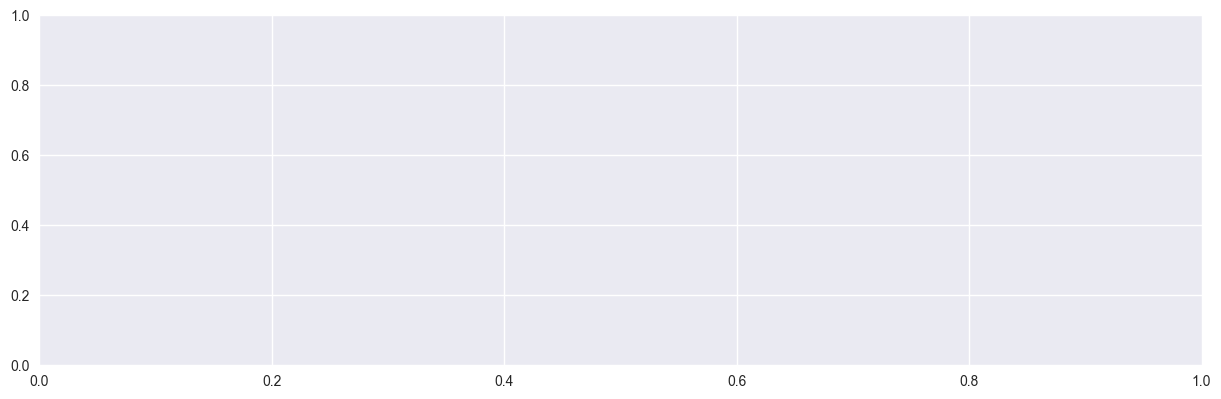

In [64]:
# Create visualization of percentile distributions
plt.figure(figsize=(15, 10))

# Box plots
plt.subplot(2, 1, 1)
sns.boxplot(data=df[numeric_cols], orient='h')
plt.title('Box Plot Distribution of Features')

# Violin plots
plt.subplot(2, 1, 2)
sns.violinplot(data=df[numeric_cols], orient='h')
plt.title('Violin Plot Distribution of Features')

plt.tight_layout()
plt.show()

# Create individual percentile plots for each feature
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 4 * n_rows))

for idx, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    
    # Plot histogram with percentile lines
    sns.histplot(df[col], kde=True)
    
    # Add vertical lines for key percentiles
    colors = ['r', 'g', 'b']
    for p, c in zip([0.25, 0.5, 0.75], colors):
        val = np.percentile(df[col], p * 100)
        plt.axvline(x=val, color=c, linestyle='--', 
                   label=f'{int(p * 100)}th percentile')
    
    plt.title(f'Distribution of {col}')
    plt.legend()

plt.tight_layout()
plt.show()

# Create cumulative distribution plots
plt.figure(figsize=(15, 10))

for col in numeric_cols:
    sorted_data = np.sort(df[col])
    cumulative = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.plot(sorted_data, cumulative, label=col)

plt.title('Cumulative Distribution Functions')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## 10. Inter-Quartile Range (IQR) Analysis

Let's analyze the spread and potential outliers using IQR.

In [ ]:
# Calculate IQR and identify potential outliers
iqr_analysis = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    
    iqr_analysis[col] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'n_outliers': len(outliers),
        'outlier_percentage': (len(outliers) / len(df)) * 100
    }

# Display results
iqr_df = pd.DataFrame(iqr_analysis).round(3)
print("=== IQR Analysis ===\n")
display(iqr_df.style
       .background_gradient(subset=['IQR', 'outlier_percentage'], cmap='YlOrRd')
       .highlight_between(subset=['outlier_percentage'], left=0, right=5, color='lightgreen')
       .highlight_between(subset=['outlier_percentage'], left=5, right=float('inf'), color='lightcoral')
       .format({'outlier_percentage': '{:.2f}%', 'IQR': '{:.3f}', 'Q1': '{:.3f}', 'Q3': '{:.3f}',
               'lower_bound': '{:.3f}', 'upper_bound': '{:.3f}'})
       .set_caption('IQR and Outlier Analysis by Feature'))

=== IQR Analysis ===



KeyError: "None of [Index(['IQR', 'outlier_percentage'], dtype='object')] are in the [columns]"